# Aaditya Deshmukh (Titanic passengers survived prediction)
- IMS Proschool Pune.
- LinkedIn ID- https://www.linkedin.com/in/aaditya-deshmukh-50174a1a3
- Github URL - https://github.com/Aaditya28-D/Projects-2020

## Data Description
1. survived - Survival (0=No, 1=Yes)
2. Pclass - Ticket class (1=1st, 2=2nd, 3=3rd)
3. Sex - Gender
4. Age - Age in years
5. Sibsp - # of siblings / spouses aboard the Titanic
6. Parch - # of parents / children aboard the Titanic
7. Ticket - Ticket number
8. Fare - Passenger fare
9. Cabin - Cabin number
10. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S =Southampton)

## A) Exploratory Data Analysis & Data Cleaning
1. Variable Identification
2. Missing values treatment
3. Univariate analysis
4. Bivariate analysis
5. Outlier treatment
6. Variable transformation

## B) Modelling
1. Logistic Regression
2. KNN Classifier
3. DecisionTree Classifier
4. RandomForest Classifier

### Loading All required packages

In [1]:
import pandas as pd
import numpy as np
import os as os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2_contingency 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings as warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [125]:
# loading dataset
data=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\Final Project  A\train.csv')

### A) Exploratory Data Analysis & Data Cleaning
### 1) Variable Identification

In [143]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
#check for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
#getting number of unique values in columns
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [106]:
data_1=data.copy()

In [107]:
#dropping 'PassengerId' column 
data_1.drop(['PassengerId'], inplace=True,axis=1)

In [108]:
#correcting the data type of few columns
data_1['Survived']=data_1['Survived'].astype('object')
data_1['Pclass']=data_1['Pclass'].astype('object')
data_1['SibSp']=data_1['SibSp'].astype('object')
data_1['Parch']=data_1['Parch'].astype('object')

In [109]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    object 
 6   Parch     891 non-null    object 
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


### 2) Missing values treatment

In [110]:
# (Age, Cabin, Embarked) columns contain null values
data_1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

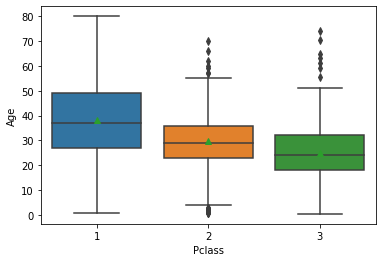

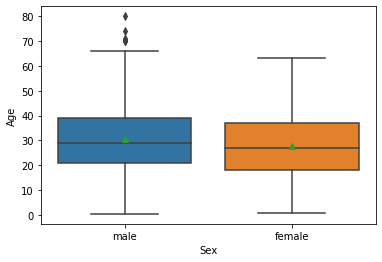

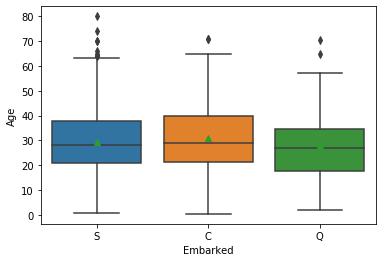

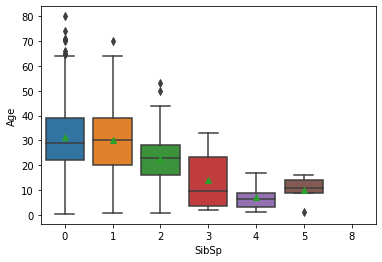

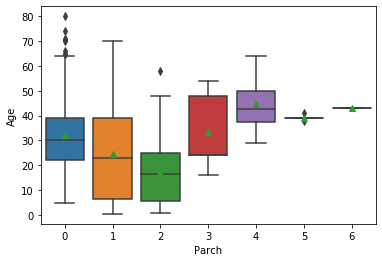

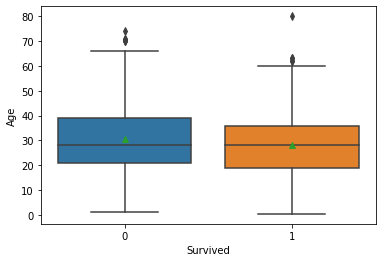

In [14]:
# getting the catagorical column which have variation of mean Age with respect to its distinct observations
col=['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Survived']

for i in col:
    sns.boxplot(x=data_1[i], y=data_1['Age'], showmeans=True)
    plt.show()

In [15]:
#in above barplots we can see that Parch vs Age barplot have good variation of mean Age with respect to Parch distinct observations
# so we will fill the null values of Age with the mean value of Age obtained with respect of Parch distinct observations

In [16]:
#getting the number of nullvalues in Age columns  with respect of Parch distinct observations
pd.crosstab(data_1['Parch'], data_1['Age'].isnull())

Age,False,True
Parch,,
0,521,157
1,110,8
2,68,12
3,5,0
4,4,0
5,5,0
6,1,0


In [17]:
#filling the null values of Age with the mean value of Age obtained with respect of Parch distinct observations
data_1['Age']=data_1['Age'].fillna(data_1['Age'].groupby(data_1['Parch']).transform('mean'))

In [18]:
# out of 891 values 687 are null in the Cabin column, As most of the values are null its better to drop Cabin column
data_1.drop(['Cabin'], axis=1, inplace=True)

In [19]:
data_1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# filling null values in Embarked column with Mode value
data_1['Embarked'].fillna('S', inplace=True)

In [21]:
#all the null values filled
data_1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [22]:
#rearranging columns 
data_1=data_1[['Pclass','Name','Sex','Age','Fare','Embarked','Ticket','SibSp','Parch','Survived']]

In [23]:
# sorting data according to Pclass in ascending order
data_1.sort_values(['Pclass'], inplace =True)

In [24]:
data_1.head(10)

,Pclass,Name,Sex,Age,Fare,Embarked,Ticket,SibSp,Parch,Survived
445,1,"Dodge, Master. Washington",male,4.000000,81.8583,S,33638,0,2,1
310,1,"Hays, Miss. Margaret Bechstein",female,24.000000,83.1583,C,11767,0,0,1
309,1,"Francatelli, Miss. Laura Mabel",female,30.000000,56.9292,C,PC 17485,0,0,1
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.000000,108.9000,C,PC 17758,1,0,1
306,1,"Fleming, Miss. Margaret",female,32.178503,110.8833,C,17421,0,0,1
305,1,"Allison, Master. Hudson Trevor",male,0.920000,151.5500,S,113781,1,2,1
710,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.000000,49.5042,C,PC 17482,0,0,1
711,1,"Klaber, Mr. Herman",male,32.178503,26.5500,S,113028,0,0,0
311,1,"Ryerson, Miss. Emily Borie",female,18.000000,262.3750,C,PC 17608,2,2,1
712,1,"Taylor, Mr. Elmer Zebley",male,48.000000,52.0000,S,19996,1,0,1


### 3) Univariate analysis

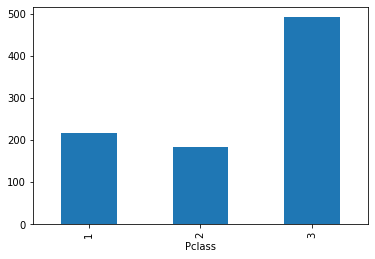

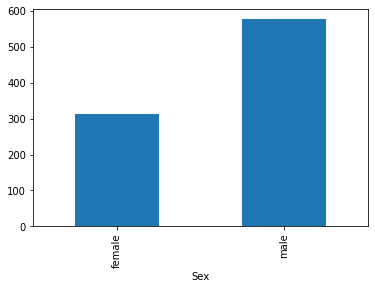

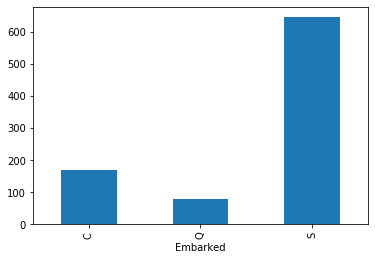

In [25]:
# univariate analysis of columns containging categorical data 
list_1=['Pclass', 'Sex', 'Embarked']

for i in list_1:
    data_1[i].value_counts().sort_index().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

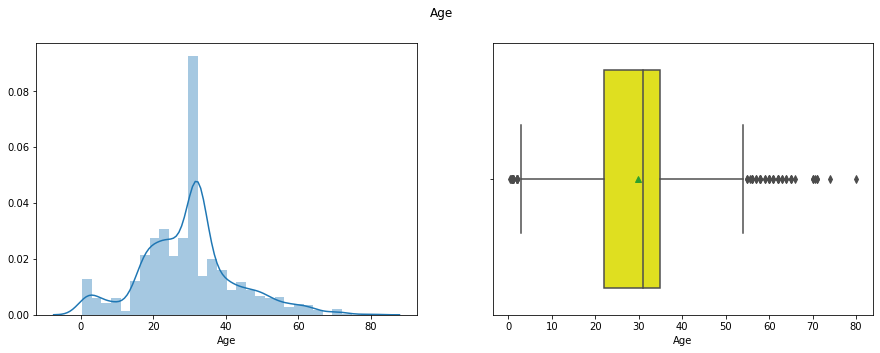

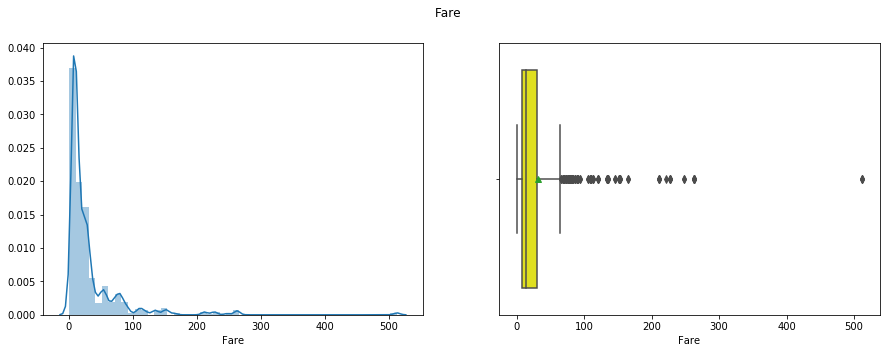

In [26]:
# univariate analysis of columns containging continuous data
list_2=['Age', 'Fare']

for x in list_2:
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data_1[x], ax=axes[0], kde=True)
    sns.boxplot(data_1[x], ax=axes[1], showmeans=True,color='yellow')
    fig.suptitle(x)

### 4) Bivariate analysis

In [27]:
#Bivariate analysis (categorical data Vs categorical data (Survived))
# Chi-Squared test
# result show only those categorical columns which have significant relation with Survived column with pvalue
list_3=['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

for x in list_3:
    table=pd.pivot_table(data_1, columns='Survived', index=x, aggfunc='count', values='Fare')
    stat, p, dof, expected = chi2_contingency(table)
    if p<0.05:
        print(x+' =', p)

Pclass = 4.549251711298793e-23
Sex = 1.1973570627755645e-58
Embarked = 2.3008626481449577e-06


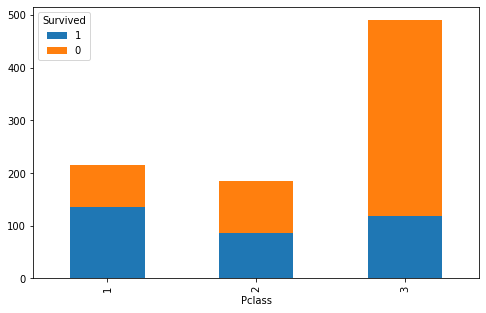

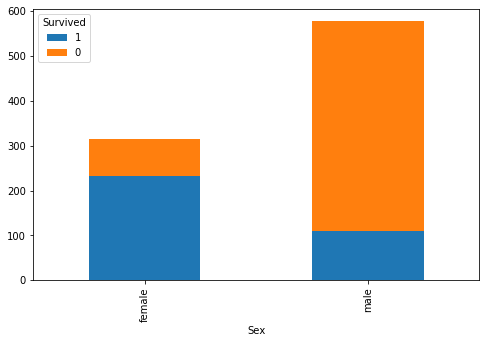

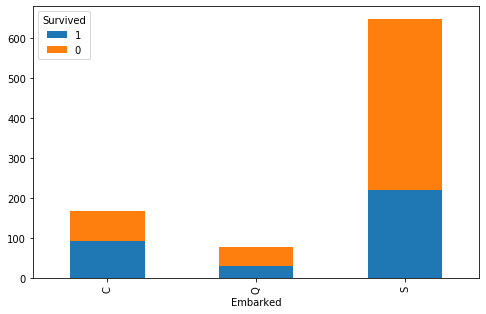

In [28]:
#Bivariate analysis Visualization (categorical data Vs categorical data (Survived))
#Stacked bar chart
list_4=['Pclass', 'Sex', 'Embarked']

for x in list_4:
    table=pd.pivot_table(data_1, columns='Survived', index=x, aggfunc='count', values='Fare')
    table.loc[:,[1,0]].plot.bar(stacked=True, figsize=(8,5))

In [29]:
#Bivariate analysis (continuous data Vs categorical data (Survived))
# Anova test
# result show only those continuous columns which have significant relation with Survived column with pvalue
list_5=['Age', 'Fare']

for x in list_5:
    fvalue, pvalue=stats.f_oneway(data_1[data_1['Survived']==0][x], data_1[data_1['Survived']==1][x])
    if pvalue<0.05:
        print(x,' =', pvalue)

Age  = 0.04289140539169673
Fare  = 6.120189341921873e-15


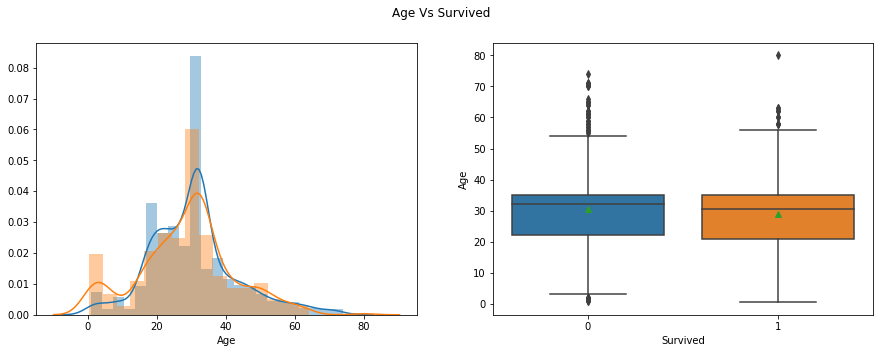

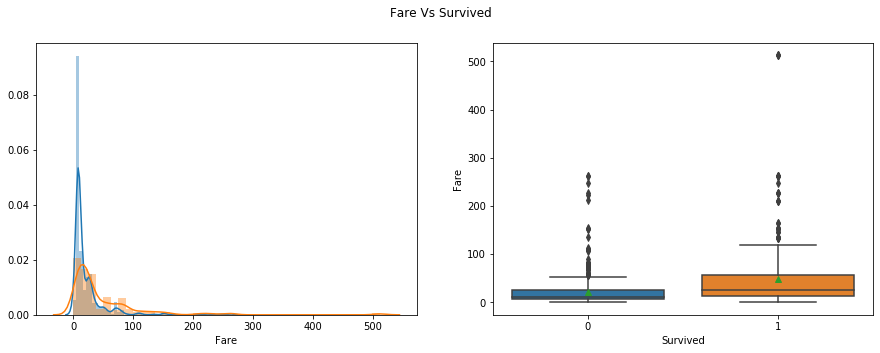

In [30]:
#Bivariate analysis Visualization (continuous data Vs categorical data (Survived))
#histogram ,boxplot
list_6=['Age', 'Fare']

for x in list_6:
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data_1[data_1['Survived']==0][x], ax=axes[0])
    sns.distplot(data_1[data_1['Survived']==1][x], ax=axes[0])
    sns.boxplot(y=data_1[x], x=data_1['Survived'], ax=axes[1], showmeans=True)
    fig.suptitle(x + ' Vs Survived')

### 5) Outlier treatment

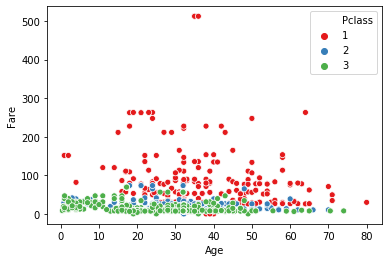

In [31]:
#In univariate analysis and bivariate analysis we can see that both 'Age and Fare'  contain outlier values its important to remove the outliers
sns.scatterplot(data_1['Age'], data_1['Fare'], hue=data_1['Pclass'], palette='Set1')

In [32]:
# The Fare column is highly skewed towards right side
# lets create new column cotaining log values of Fare to reduce the skewness
data_1['log_Fare']=np.log(data_1['Fare']+1)

In [33]:
#we can see upper limit , lower limit, number of outliers in right side and left side of Age, Fare, and Log_Fare columns in output

col=['Age', 'Fare','log_Fare']

for k in col:
        Q3=np.percentile(data_1[k], 75)
        Q1=np.percentile(data_1[k], 25)
        ul=Q3+1.5*(Q3-Q1)
        ll=Q1-1.5*(Q3-Q1)
        print(k,'- ( upper limit =', round(ul,2), ',' , 'lower limit = ', round(ll, 2), ')')
        print('right = ', len(data_1.loc[data_1[k]>ul,:]))
        print('left=', len(data_1.loc[data_1[k]<ll,:]))

Age - ( upper limit = 54.5 , lower limit =  2.5 )
right =  42
left= 24
Fare - ( upper limit = 65.63 , lower limit =  -26.72 )
right =  116
left= 0
log_Fare - ( upper limit = 5.38 , lower limit =  0.27 )
right =  16
left= 15


In [34]:
(np.percentile(data_1['Age'], 95), np.percentile(data_1['Age'], 5))

(54.0, 6.0)

In [35]:
# capping the outlier values on right and left side at the mean + 2 & -2 standard deviation value ,i.e 95, 5, percentile respectively
data_1.loc[data_1['Age']>54.5,'Age']=np.percentile(data_1['Age'], 95)
data_1.loc[data_1['Age']<2.5,'Age']=np.percentile(data_1['Age'], 5)

In [36]:
(np.percentile(data_1['Fare'], 95), np.percentile(data_1['Fare'], 5))

(112.07915, 7.225)

In [37]:
np.median(data_1['Fare'])

14.4542

In [38]:
#95 percentile value (112.07) > upper limit (65.63) value of Fare so capping outlier to 95 percentile value will not solve the problem of outlier
#hence we will convert the outlier value ot median value
data_1.loc[data_1['Fare']>65.63,'Fare']=np.median(data_1['Fare'])

In [39]:
(np.percentile(data_1['log_Fare'], 95), np.percentile(data_1['log_Fare'], 5))

(4.728032094002511, 2.1071782966514356)

In [40]:
# capping the outlier values on right and left side at the mean + 2 & -2 standard deviation value ,i.e 95, 5, percentile respectively
data_1.loc[data_1['log_Fare']>5.38,'log_Fare']=np.percentile(data_1['log_Fare'], 95)
data_1.loc[data_1['log_Fare']<0.27,'log_Fare']=np.percentile(data_1['log_Fare'], 5)

Age - ( upper limit = 54.5 , lower limit =  2.5 )
right =  0
left= 0
Fare - ( upper limit = 48.51 , lower limit =  -16.45 )
right =  48
left= 0
log_Fare - ( upper limit = 5.38 , lower limit =  0.27 )
right =  0
left= 0


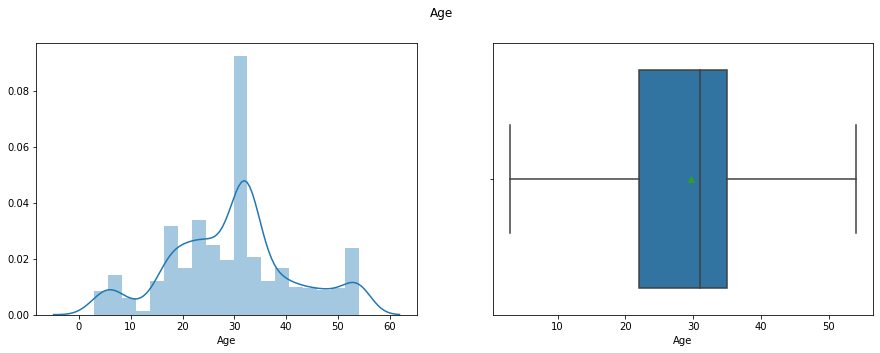

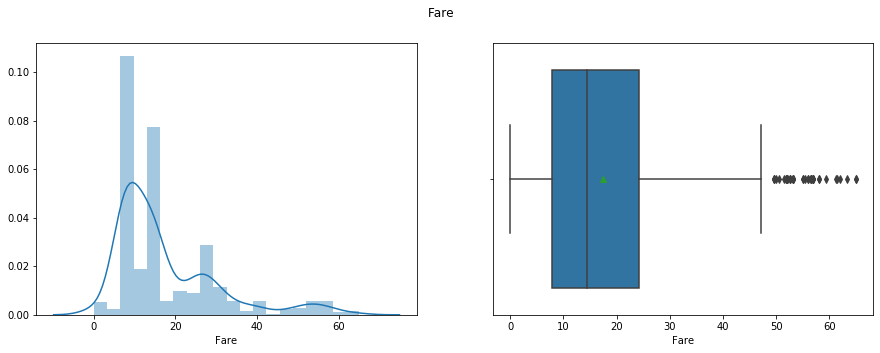

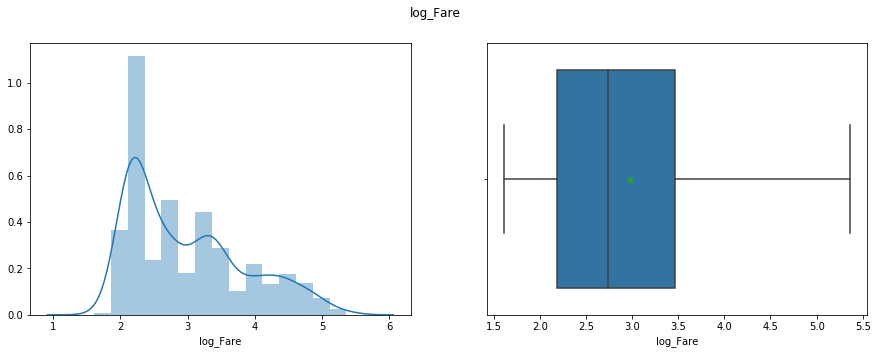

In [41]:
# In the result after outlier treatment still we can see some outlier in Fare column but in Log_Fare column it has reduced the skewness and also removed all the outlier
# hence we will work with log_Fare column in place of Fare column from now onwards 

col=['Age', 'Fare', 'log_Fare']

for k in col:
        Q3=np.percentile(data_1[k], 75)
        Q1=np.percentile(data_1[k], 25)
        ul=Q3+1.5*(Q3-Q1)
        ll=Q1-1.5*(Q3-Q1)
        print(k,'- ( upper limit =', round(ul,2), ',' , 'lower limit = ', round(ll, 2), ')')
        print('right = ', len(data_1.loc[data_1[k]>ul,:]))
        print('left=', len(data_1.loc[data_1[k]<ll,:]))
        
for x in col:
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data_1[x], ax=axes[0])
    sns.boxplot(x=data_1[x], ax=axes[1], showmeans=True)
    fig.suptitle(x)

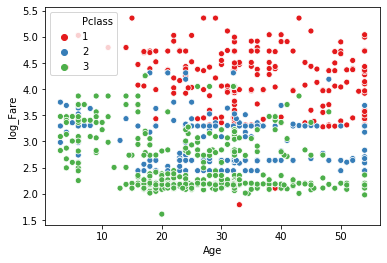

In [42]:
#we can see that even after doing outlier treatment the the distribution is not Affected much.
sns.scatterplot(data_1['Age'], data_1['log_Fare'], hue=data_1['Pclass'], palette='Set1')

### 6) Variable transformation

In [43]:
data_1.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Ticket,SibSp,Parch,Survived,log_Fare
445,1,"Dodge, Master. Washington",male,4.000000,14.4542,S,33638,0,2,1,4.417132
310,1,"Hays, Miss. Margaret Bechstein",female,24.000000,14.4542,C,11767,0,0,1,4.432700
309,1,"Francatelli, Miss. Laura Mabel",female,30.000000,56.9292,C,PC 17485,0,0,1,4.059222
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.000000,14.4542,C,PC 17758,1,0,1,4.699571
306,1,"Fleming, Miss. Margaret",female,32.178503,14.4542,C,17421,0,0,1,4.717456


In [44]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Ticket    891 non-null    object 
 7   SibSp     891 non-null    object 
 8   Parch     891 non-null    object 
 9   Survived  891 non-null    object 
 10  log_Fare  891 non-null    float64
dtypes: float64(3), object(8)
memory usage: 123.5+ KB


In [45]:
# dropping few useless columns from the dataset.
data_2=data_1.drop(['Name','Ticket', 'Fare'], axis=1)

In [46]:
data_2.head()

,Pclass,Sex,Age,Embarked,SibSp,Parch,Survived,log_Fare
445,1,male,4.000000,S,0,2,1,4.417132
310,1,female,24.000000,C,0,0,1,4.432700
309,1,female,30.000000,C,0,0,1,4.059222
307,1,female,17.000000,C,1,0,1,4.699571
306,1,female,32.178503,C,0,0,1,4.717456


In [47]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    object 
 4   SibSp     891 non-null    object 
 5   Parch     891 non-null    object 
 6   Survived  891 non-null    object 
 7   log_Fare  891 non-null    float64
dtypes: float64(2), object(6)
memory usage: 102.6+ KB


In [48]:
# converting categorical variables to dummies
data_2_cat=data_2.drop(['Age', 'log_Fare'], axis=1)
data_2_num=data_2[['Age', 'log_Fare']]
data_2_cat_dummies=pd.get_dummies(data_2_cat, drop_first=True)
data_3=pd.concat([data_2_num, data_2_cat_dummies], axis=1)

In [49]:
#getting datatypes of columns in final dataset
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   log_Fare    891 non-null    float64
 2   Pclass_2    891 non-null    uint8  
 3   Pclass_3    891 non-null    uint8  
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
 7   SibSp_1     891 non-null    uint8  
 8   SibSp_2     891 non-null    uint8  
 9   SibSp_3     891 non-null    uint8  
 10  SibSp_4     891 non-null    uint8  
 11  SibSp_5     891 non-null    uint8  
 12  SibSp_8     891 non-null    uint8  
 13  Parch_1     891 non-null    uint8  
 14  Parch_2     891 non-null    uint8  
 15  Parch_3     891 non-null    uint8  
 16  Parch_4     891 non-null    uint8  
 17  Parch_5     891 non-null    uint8  
 18  Parch_6     891 non-null    uint8  
 19  Survived_1  891 non-null   

In [50]:
# no null value present in final dataset
data_3.isnull().sum()

Age           0
log_Fare      0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Survived_1    0
dtype: int64

### B) Modelling

In [51]:
#understanding the variable importance in prediction present in our final dataset with the help of RandomForestClassifier feature_importances_ 

x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8, random_state=100)
rc=RandomForestClassifier(n_estimators=1000, random_state=100)
rc.fit(x_train, y_train)
y=rc.feature_importances_

feature_importance={'feature_name':data_3.drop(['Survived_1'], axis=1).columns.to_list(), 'feature_importance':y}
feature_imp_table_2=pd.DataFrame(feature_importance)
feature_imp_table_2['feature_importance']=feature_imp_table_2['feature_importance']*100
feature_imp_table_2.sort_values(['feature_importance'], ascending=False, inplace=True)
feature_imp_table_2

,feature_name,feature_importance
1,log_Fare,28.132225
0,Age,26.310907
4,Sex_male,25.509746
3,Pclass_3,5.423765
6,Embarked_S,2.593115
7,SibSp_1,2.538538
13,Parch_1,1.996699
2,Pclass_2,1.650366
14,Parch_2,1.587348
5,Embarked_Q,0.997760


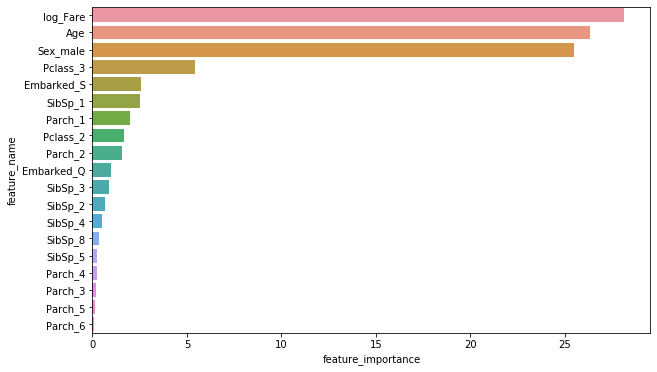

In [52]:
axes=plt.subplots(figsize=(10,6))
sns.barplot(x='feature_importance', y='feature_name', data=feature_imp_table_2)

### 1) Logistic Regression.

In [53]:
# creating x and y varialbes
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]

#spliting the dataset in train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

#model fit
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# getting probabilities of Passenger survival for training and testing dataset 
y_train_prob=lr.predict_proba(x_train)[:,1]
y_test_prob=lr.predict_proba(x_test)[:,1]

In [55]:
# Roc curve function
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [56]:
# getting false positive rate, true positive rate, at different threshold values for ploting the Roc curve
#at best threshold value we get the  minimum false positive rate and maximum true positive rate 
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

In [57]:
# getting the accuracy score on training dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_train_pred = np.where(y_train_prob>thres,1,0)
    accuracy.append(accuracy_score(y_train, y_train_pred, normalize=True))
    
train_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
train_accuracy.columns = ['thresholds', 'accuracy']

In [58]:
# getting the accuracy score on testing dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_test_pred = np.where(y_test_prob>thres,1,0)
    accuracy.append(accuracy_score(y_test, y_test_pred, normalize=True))
    
test_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
test_accuracy.columns = ['thresholds', 'accuracy']

In [59]:
#creating new dataset containing, True_positive_rate, False_positive_rate, train_accuracy, test_accuracy, and  mean_accuracy of train_accuracy and test_accuracy at all the thresholds values
#now at the maximum mean_accuracy we get minimum false positive rate and maximum true positive rate 
# hence we can get the best threshold from the table below

accuracy_table=pd.DataFrame()
accuracy_table['thresholds']=train_accuracy['thresholds']
accuracy_table['True_positive_rate']=tpr
accuracy_table['False_positive_rate']=fpr
accuracy_table['train_accuracy']=train_accuracy['accuracy']
accuracy_table['test_accuracy']=test_accuracy['accuracy']
accuracy_table['mean_accuracy']=accuracy_table[['train_accuracy', 'test_accuracy']].mean(axis=1)
accuracy_table.sort_values(['mean_accuracy'], ascending=False, inplace=True)
accuracy_table.head(5)

,thresholds,True_positive_rate,False_positive_rate,train_accuracy,test_accuracy,mean_accuracy
43,0.577193,0.634783,0.083969,0.810594,0.813433,0.812013
60,0.491364,0.708696,0.122137,0.817014,0.805970,0.811492
36,0.614638,0.573913,0.068702,0.797753,0.824627,0.811190
44,0.575878,0.634783,0.086514,0.812199,0.809701,0.810950
45,0.575464,0.639130,0.086514,0.810594,0.809701,0.810148


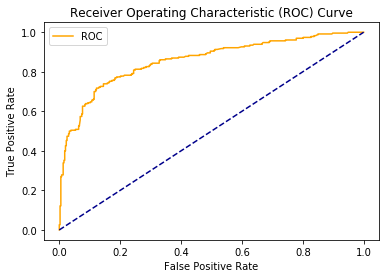

In [60]:
# Roc curve (false positive rate Vs true positive rate)
plot_roc_curve(fpr, tpr)

In [61]:
# we change the threshold value to 0.577193 at which True_positive_rate is 0.634783 and False_positive_rate is 0.083969
# getting the Passenger survival prediction on training dataset and testing dataset at new threshold value
y_train_pred = np.where(y_train_prob>0.577193,1,0)
y_test_pred = np.where(y_test_prob>0.577193,1,0)

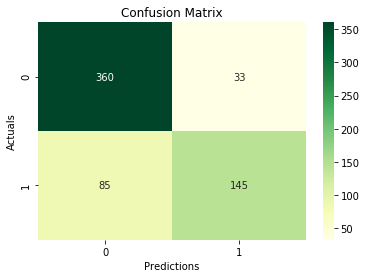

In [62]:
#confusion matrix on training dataset for analysis the accuracy of prediction 
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

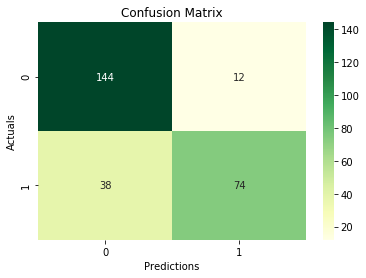

In [63]:
#confusion matrix on testing dataset for analysis the accuracy of prediction 
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [64]:
print('Logistic Regression accuracy_score')
print('Train Accuracy:',round(accuracy_score(y_train, y_train_pred),4), ', Test Accuracy:' ,round(accuracy_score(y_test, y_test_pred), 4))

Logistic Regression accuracy_score
Train Accuracy: 0.8106 , Test Accuracy: 0.8134


### 2) KNN Classifier

In [65]:
#deciding n_neighbors value for KNN Classifier
#we get the Accuracy score for training dataset and testing dataset at different K values
# we should choose best k value where we get maximum Accuracy without getting model overfitted.

k_values=[1,3,5,7,9,11,13]
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    print('K=',k, ':- Train Accuracy:',round(knn.score(x_train, y_train),5), ', Test Accuracy:' ,round(knn.score(x_test, y_test), 5))

K= 1 :- Train Accuracy: 0.97592 , Test Accuracy: 0.72015
K= 3 :- Train Accuracy: 0.86838 , Test Accuracy: 0.73881
K= 5 :- Train Accuracy: 0.83949 , Test Accuracy: 0.73134
K= 7 :- Train Accuracy: 0.81541 , Test Accuracy: 0.70149
K= 9 :- Train Accuracy: 0.79775 , Test Accuracy: 0.70896
K= 11 :- Train Accuracy: 0.78973 , Test Accuracy: 0.70522
K= 13 :- Train Accuracy: 0.7817 , Test Accuracy: 0.6903


In [66]:
# from above result we get Best k value as 5 where we get max Accuracy without getting model overfitted
# creating x and y varialbes
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]

#spliting dataset into train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

#model fitting
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
# getting probabilities of Passenger survival for training and testing dataset 
y_train_prob=knn.predict_proba(x_train)[:,1]
y_test_prob=knn.predict_proba(x_test)[:,1]

In [68]:
# getting false positive rate, true positive rate, at different threshold values for ploting the Roc curve
#at best threshold value we get the  minimum false positive rate and maximum true positive rate 
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

In [69]:
# getting the accuracy score on training dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_train_pred = np.where(y_train_prob>thres,1,0)
    accuracy.append(accuracy_score(y_train, y_train_pred, normalize=True))
    
train_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
train_accuracy.columns = ['thresholds', 'accuracy']

In [70]:
# getting the accuracy score on testing dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_test_pred = np.where(y_test_prob>thres,1,0)
    accuracy.append(accuracy_score(y_test, y_test_pred, normalize=True))
    
test_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
test_accuracy.columns = ['thresholds', 'accuracy']

In [71]:
#creating new dataset containing, True_positive_rate, False_positive_rate, train_accuracy, test_accuracy, and  mean_accuracy of train_accuracy and test_accuracy at all the thresholds values
#now at the maximum mean_accuracy we get minimum false positive rate and maximum true positive rate 
#hence we can get the best threshold from the table below

accuracy_table=pd.DataFrame()
accuracy_table['thresholds']=train_accuracy['thresholds']
accuracy_table['True_positive_rate']=tpr
accuracy_table['False_positive_rate']=fpr
accuracy_table['train_accuracy']=train_accuracy['accuracy']
accuracy_table['test_accuracy']=test_accuracy['accuracy']
accuracy_table['mean_accuracy']=accuracy_table[['train_accuracy', 'test_accuracy']].mean(axis=1)
accuracy_table.sort_values(['mean_accuracy'], ascending=False, inplace=True)
accuracy_table.head(5)

,thresholds,True_positive_rate,False_positive_rate,train_accuracy,test_accuracy,mean_accuracy
4,0.4,0.865217,0.208651,0.839486,0.731343,0.785415
5,0.2,1.000000,0.618321,0.818620,0.738806,0.778713
3,0.6,0.686957,0.071247,0.778491,0.671642,0.725066
2,0.8,0.447826,0.027990,0.707865,0.649254,0.678559
0,2.0,0.000000,0.000000,0.630819,0.582090,0.606454


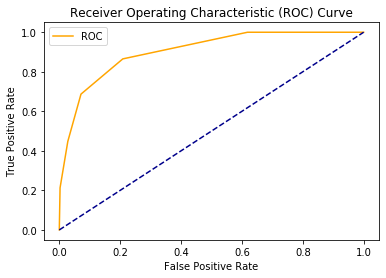

In [72]:
# Roc curve (false positive rate Vs true positive rate)
plot_roc_curve(fpr, tpr)

In [73]:
# we change the threshold value to 0.4 at which True_positive_rate is 0.865217 and False_positive_rate is 0.208651
# getting the Passenger survival prediction on training dataset and testing dataset at new threshold value
y_train_pred = np.where(y_train_prob>0.4,1,0)
y_test_pred = np.where(y_test_prob>0.4,1,0)

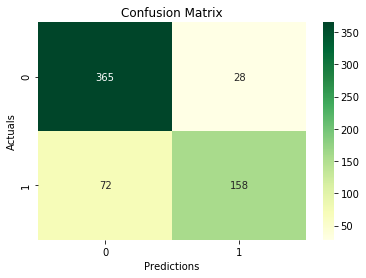

In [74]:
#confusion matrix on training dataset for analysis the accuracy of prediction 
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

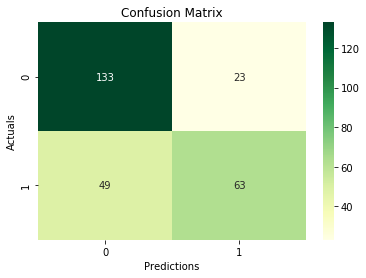

In [75]:
#confusion matrix on testing dataset for analysis the accuracy of prediction 
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [76]:
print('KNN accuracy_score')
print('Train Accuracy:',round(accuracy_score(y_train, y_train_pred),4), ', Test Accuracy:' ,round(accuracy_score(y_test, y_test_pred), 4))

KNN accuracy_score
Train Accuracy: 0.8395 , Test Accuracy: 0.7313


### 3) DecisionTree Classifier

In [77]:
#deciding max_depth value for DecisionTree Classifier
#we get the Accuracy score for training dataset and testing dataset at different d values
# we should choose best d value where we get maximum Accuracy without getting model overfitted.

d_values=[1,2,3,4,5,6,7,8,9,10]
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

for d in d_values:
    dc=DecisionTreeClassifier(max_depth=d)
    dc.fit(x_train, y_train)
    print(d,':- Train Accuracy:',round(dc.score(x_train, y_train),5), ', Test Accuracy:' ,round(dc.score(x_test, y_test), 5))

1 :- Train Accuracy: 0.78812 , Test Accuracy: 0.78358
2 :- Train Accuracy: 0.79775 , Test Accuracy: 0.77985
3 :- Train Accuracy: 0.82825 , Test Accuracy: 0.81343
4 :- Train Accuracy: 0.84109 , Test Accuracy: 0.80224
5 :- Train Accuracy: 0.86035 , Test Accuracy: 0.78731
6 :- Train Accuracy: 0.86356 , Test Accuracy: 0.77985
7 :- Train Accuracy: 0.8764 , Test Accuracy: 0.77612
8 :- Train Accuracy: 0.89085 , Test Accuracy: 0.78358
9 :- Train Accuracy: 0.91172 , Test Accuracy: 0.78731
10 :- Train Accuracy: 0.92295 , Test Accuracy: 0.76493


In [78]:
# from above result we get Best max_depth value as 3 where we get max Accuracy without getting model overfitted
# creating x and y varialbes
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]

#spliting dataset into train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

#model fitting
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
# getting probabilities of Passenger survival for training and testing dataset 
y_train_prob=dc.predict_proba(x_train)[:,1]
y_test_prob=dc.predict_proba(x_test)[:,1]

In [80]:
# getting false positive rate, true positive rate, at different threshold values for ploting the Roc curve
#at best threshold value we get the  minimum false positive rate and maximum true positive rate 
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

In [81]:
# getting the aaccuracy score on training dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_train_pred = np.where(y_train_prob>thres,1,0)
    accuracy.append(accuracy_score(y_train, y_train_pred, normalize=True))
    
train_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
train_accuracy.columns = ['thresholds', 'accuracy']

In [82]:
# getting the aaccuracy score on testing dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_test_pred = np.where(y_test_prob>thres,1,0)
    accuracy.append(accuracy_score(y_test, y_test_pred, normalize=True))
    
test_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
test_accuracy.columns = ['thresholds', 'accuracy']

In [83]:
#creating new dataset containing, True_positive_rate, False_positive_rate, train_accuracy, test_accuracy, and  mean_accuracy of train_accuracy and test_accuracy at all the thresholds values
#now at the maximum mean_accuracy we get minimum false positive rate and maximum true positive rate 
#hence we can get the best threshold from the table below

accuracy_table=pd.DataFrame()
accuracy_table['thresholds']=round(train_accuracy['thresholds'],3)
accuracy_table['True_positive_rate']=tpr
accuracy_table['False_positive_rate']=fpr
accuracy_table['train_accuracy']=train_accuracy['accuracy']
accuracy_table['test_accuracy']=test_accuracy['accuracy']
accuracy_table['mean_accuracy']=accuracy_table[['train_accuracy', 'test_accuracy']].mean(axis=1)
accuracy_table.sort_values(['mean_accuracy'], ascending=False, inplace=True)
accuracy_table.head(5)

,thresholds,True_positive_rate,False_positive_rate,train_accuracy,test_accuracy,mean_accuracy
5,0.341,0.852174,0.256997,0.828250,0.813433,0.820842
4,0.593,0.721739,0.109415,0.802568,0.798507,0.800538
3,0.714,0.500000,0.020356,0.797753,0.787313,0.792533
6,0.286,0.869565,0.282443,0.783307,0.746269,0.764788
7,0.118,0.878261,0.320611,0.773676,0.738806,0.756241


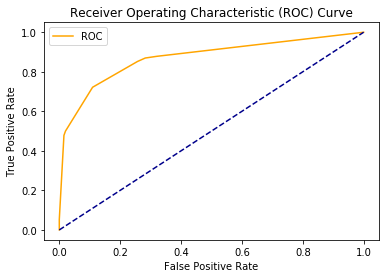

In [84]:
# Roc curve (false positive rate Vs true positive rate)
plot_roc_curve(fpr, tpr)

In [85]:
# we change the threshold value to 0.341 at which True_positive_rate is 0.852174 and False_positive_rate is 0.256997
# getting the Passenger survival prediction on training dataset and testing dataset at new threshold value
y_train_pred = np.where(y_train_prob>0.341,1,0)
y_test_pred = np.where(y_test_prob>0.341,1,0)

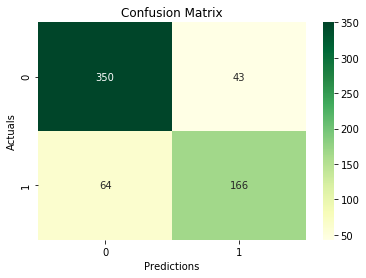

In [86]:
#confusion matrix on training dataset for analysis the accuracy of prediction
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

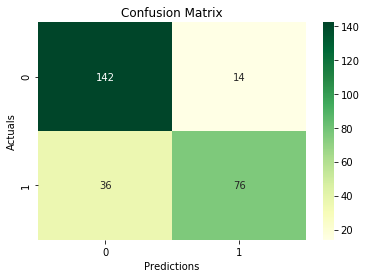

In [87]:
#confusion matrix on testing dataset for analysis the accuracy of prediction
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [88]:
print('DecisionTree accuracy_score')
print('Train Accuracy:',round(accuracy_score(y_train, y_train_pred),4), ', Test Accuracy:' ,round(accuracy_score(y_test,y_test_pred ), 4))

DecisionTree accuracy_score
Train Accuracy: 0.8283 , Test Accuracy: 0.8134


### 4) RandomForest Classifier

In [89]:
#deciding max_depth value for RandomForest Classifier 
#we get the Accuracy score for training dataset and testing dataset at different r values
# we should choose best r value where we get maximum Accuracy without getting model overfitted.
r_values=[1,2,3,4,5,6,7,8,9,10]
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

for r in r_values:
    rc=RandomForestClassifier(n_estimators=1000, max_depth=r, random_state=100)
    rc.fit(x_train, y_train)
    print(r, ':- Train Accuracy:',round(rc.score(x_train, y_train),5), ', Test Accuracy:' ,round(rc.score(x_test, y_test), 5))

1 :- Train Accuracy: 0.72231 , Test Accuracy: 0.69403
2 :- Train Accuracy: 0.80257 , Test Accuracy: 0.79478
3 :- Train Accuracy: 0.82343 , Test Accuracy: 0.81343
4 :- Train Accuracy: 0.8427 , Test Accuracy: 0.82836
5 :- Train Accuracy: 0.85393 , Test Accuracy: 0.81716
6 :- Train Accuracy: 0.85714 , Test Accuracy: 0.81716
7 :- Train Accuracy: 0.87961 , Test Accuracy: 0.81716
8 :- Train Accuracy: 0.89085 , Test Accuracy: 0.81716
9 :- Train Accuracy: 0.91974 , Test Accuracy: 0.8209
10 :- Train Accuracy: 0.93258 , Test Accuracy: 0.8209


In [90]:
# from above result we get Best max_depth value as 4 where we get max Accuracy without getting model overfitted
# creating x and y varialbes
x=data_3.drop(['Survived_1'], axis=1)
y=data_3[['Survived_1']]

#spliting dataset into train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=100)

#model fitting
rc=RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [91]:
# getting probabilities of Passenger survival for training and testing dataset 
y_train_prob=rc.predict_proba(x_train)[:,1]
y_test_prob=rc.predict_proba(x_test)[:,1]

In [92]:
# getting false positive rate, true positive rate, at different threshold values for ploting the Roc curve
#at best threshold value we get the  minimum false positive rate and maximum true positive rate 
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

In [93]:
# getting the aaccuracy score on training dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_train_pred = np.where(y_train_prob>thres,1,0)
    accuracy.append(accuracy_score(y_train, y_train_pred, normalize=True))
    
train_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
train_accuracy.columns = ['thresholds', 'accuracy']

In [94]:
# getting the aaccuracy score on testing dataset at different threshold values

accuracy = []
for thres in thresholds:
    y_test_pred = np.where(y_test_prob>thres,1,0)
    accuracy.append(accuracy_score(y_test, y_test_pred, normalize=True))
    
test_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                        axis=1)
test_accuracy.columns = ['thresholds', 'accuracy']

In [95]:
#creating new dataset containing, True_positive_rate, False_positive_rate, train_accuracy, test_accuracy, and  mean_accuracy of train_accuracy and test_accuracy at all the thresholds values
#now at the maximum mean_accuracy we get minimum false positive rate and maximum true positive rate 
#hence we can get the best threshold from the table below

accuracy_table=pd.DataFrame()
accuracy_table['thresholds']=round(train_accuracy['thresholds'],3)
accuracy_table['True_positive_rate']=tpr
accuracy_table['False_positive_rate']=fpr
accuracy_table['train_accuracy']=train_accuracy['accuracy']
accuracy_table['test_accuracy']=test_accuracy['accuracy']
accuracy_table['mean_accuracy']=accuracy_table[['train_accuracy', 'test_accuracy']].mean(axis=1)
accuracy_table.sort_values(['mean_accuracy'], ascending=False, inplace=True)
accuracy_table.head(5)

,thresholds,True_positive_rate,False_positive_rate,train_accuracy,test_accuracy,mean_accuracy
33,0.499,0.647826,0.040712,0.842697,0.828358,0.835527
32,0.510,0.634783,0.040712,0.841091,0.824627,0.832859
43,0.446,0.708696,0.068702,0.850722,0.813433,0.832078
44,0.446,0.713043,0.068702,0.849117,0.813433,0.831275
46,0.441,0.726087,0.073791,0.850722,0.809701,0.830212


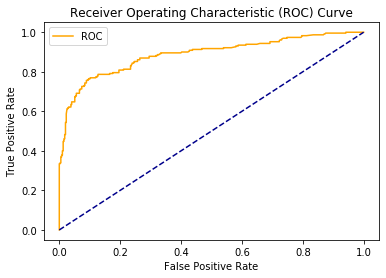

In [96]:
# Roc curve (false positive rate Vs true positive rate)
plot_roc_curve(fpr, tpr)

In [97]:
# we change the threshold value to 0.499 at which True_positive_rate is 0.647826 and False_positive_rate is 0.040712
# getting the Passenger survival prediction on training dataset and testing dataset at new threshold value
y_train_pred = np.where(y_train_prob>0.499,1,0)
y_test_pred = np.where(y_test_prob>0.499,1,0)

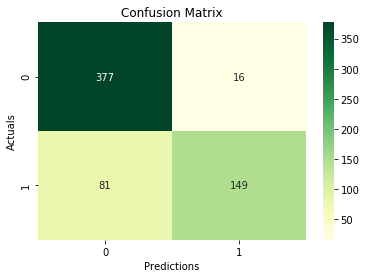

In [98]:
#confusion matrix on training dataset for analysis the accuracy of prediction
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

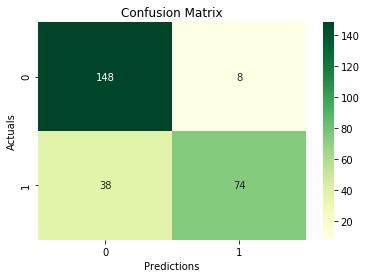

In [99]:
#confusion matrix on testing dataset for analysis the accuracy of prediction
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [100]:
print('RandomForest accuracy_score')
print('Train Accuracy:',round(accuracy_score(y_train, y_train_pred),4), ', Test Accuracy:' ,round(accuracy_score(y_test,y_test_pred ), 4))

RandomForest accuracy_score
Train Accuracy: 0.8443 , Test Accuracy: 0.8284


In [101]:
# Results of all the models 
result={'Name of Model':['Logistic Regression','KNN Classifier','DecisionTree Classifier','RandomForest Classifier'], 'train_accuracy':[0.8106,0.8395,0.8283,0.8443],'test_accuracy':[0.8134,0.7313,0.8134,0.8284]}
result=pd.DataFrame(result)
result[['train_accuracy','test_accuracy']]=result[['train_accuracy','test_accuracy']]
result

,Name of Model,train_accuracy,test_accuracy
0,Logistic Regression,0.8106,0.8134
1,KNN Classifier,0.8395,0.7313
2,DecisionTree Classifier,0.8283,0.8134
3,RandomForest Classifier,0.8443,0.8284


#### In all models RandomForest Classifier gave the best results. i.e train_accuracy= 84.43% and test_accuracy= 82.84%